# Notebook for testing Caption Generator Program Code

### Masking unnecessary warnings for easy readability

In [1]:
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

### Clearing the Tensorflow GPU Memory before training models.  Also enable memory growth on all GPUs

In [2]:
import tensorflow as tf

# Enable memory growth for all GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

E0000 00:00:1733234943.695880  259946 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733234943.699023  259946 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Set Paths for the Input Folders & Files to Handle

In [3]:
current_dir = os.getcwd()
# Path to dataset
dataset_path = os.path.join(current_dir, 'dataset')
# Image file path
image_file_path = os.path.join(current_dir, 'dataset', 'images')
# Path to models
model_path = os.path.join(current_dir, 'models')
# Path to generated data
generated_data_path = os.path.join(current_dir, 'generated_data')

# Path to caption text file
caption_text_file = dataset_path + '/' + 'captions.txt'
# Path to image files
image_files = dataset_path + '/' + 'images'

# Step 1: Download dataset from Kaggle

In [4]:
import os
from import_dataset import ImportData

current_dir = os.getcwd()
destination_path = os.path.join(current_dir, 'dataset')

DataImport = ImportData()

DataImport.download(destination_path)

Path to dataset files: /home/npate145/.cache/kagglehub/datasets/nunenuh/flickr8k/versions/2
Files and folders copied successfully.


# Step 2: Data Exploration

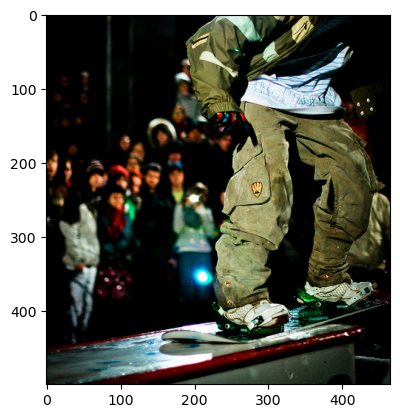

Shape of the Image  = (500, 465, 3)
3050264832_4215f2b398.jpg|0|A boy is standing on a snowboard in front of a crowd .

3050264832_4215f2b398.jpg|1|A crowd stands in the background watching someone sliding down a ramp on a board .

3050264832_4215f2b398.jpg|2|A crowd watching a snowboarder .

3050264832_4215f2b398.jpg|3|A man sliding on a concrete bench on his snowboard as people watch

3050264832_4215f2b398.jpg|4|Snowboarder is standing on his board while the crowd watches him .



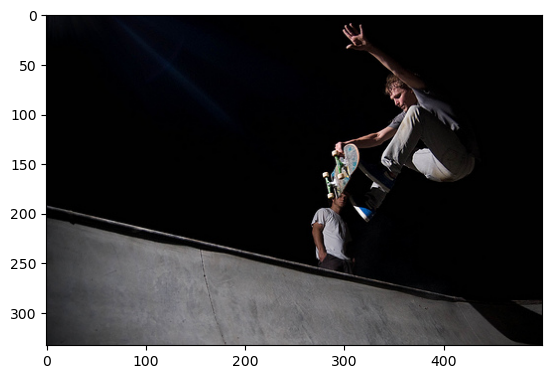

Shape of the Image  = (333, 500, 3)
3064097919_e536ab9693.jpg|0|A skateboarder is doing a trick at the top of a ramp while another person watches .

3064097919_e536ab9693.jpg|1|A skateboarder is doing a trick off of a ramp while a guy looks on .

3064097919_e536ab9693.jpg|2|A skateboarder is in midair in the middle of a trick .

3064097919_e536ab9693.jpg|3|A teenage boy does a skateboard trick on a half pipe while another boy watches from the top .

3064097919_e536ab9693.jpg|4|Young man doing a trick jump on a skateboard .



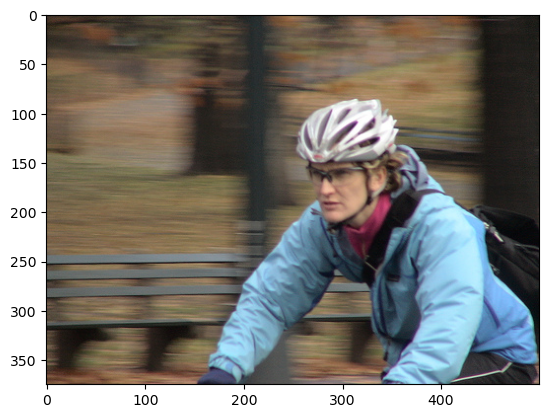

Shape of the Image  = (375, 500, 3)
2084217208_7bd9bc85e5.jpg|0|A person in a blue jacket , wearing a bicycle helmet is riding a bike

2084217208_7bd9bc85e5.jpg|1|A woman is riding her bicycle .

2084217208_7bd9bc85e5.jpg|2|A woman riding a bike in a park

2084217208_7bd9bc85e5.jpg|3|A woman with a blue jacket wears a helmet as she rides a bike .

2084217208_7bd9bc85e5.jpg|4|A woman with a helmet riding a bike .



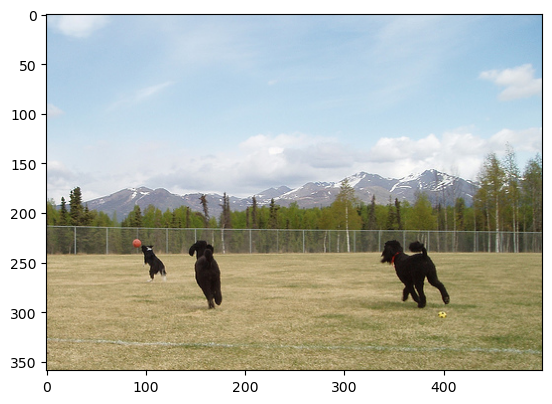

Shape of the Image  = (359, 500, 3)
3562470436_6e193643ce.jpg|0|Three black dogs playing in a fenced area with a ball .

3562470436_6e193643ce.jpg|1|Three black dogs running after an orange ball .

3562470436_6e193643ce.jpg|2|Three dogs are playing with a red ball in a field .

3562470436_6e193643ce.jpg|3|Three dogs play with a red ball .

3562470436_6e193643ce.jpg|4|Three dogs run after a ball in a field .



In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

# Check shape of the images by using a random image 
files = [f for f in os.listdir(image_file_path) if os.path.isfile(os.path.join(image_file_path, f))]
image_files = files[:4]

# Check the contents of the caption text file
with open(caption_text_file, 'r') as file:
    lines = file.readlines()

for img in image_files:
    image = Image.open(os.path.join(image_file_path, img))
    image = np.array(image)

    plt.imshow(image)
    plt.show()

    print(f'Shape of the Image  = {image.shape}')

    for line in lines:
        if line.__contains__(img):
            print(line)

# Step 3: Image Feature Extraction

In [6]:
# Define what keras feature extraction model to use
feature_extraction_algo_name = 'VGG16'

In [7]:
# %%script True

from feature_extractor import ExtractFeatures
import pickle
import time

# Instantiate the ExtractFeatures() class
FeatExtractor_Obj = ExtractFeatures(feature_extraction_algo_name)

# Load keras feature extraction model
FeatExtractor_Obj.init_model()

# Kick off timer
start_time = time.perf_counter()
# Extract Features from the Image data
image_features = FeatExtractor_Obj.extract_features(image_file_path)
# End timer
end_time = time.perf_counter()

feature_extraction_elapsed_time = float(end_time - start_time) * 10**6

# Save image features to a pickle file
pickle_file_name = os.path.join(generated_data_path, ('features_' + feature_extraction_algo_name + '.pkl'))
os.makedirs(os.path.dirname(pickle_file_name), exist_ok=True)
FeatExtractor_Obj.save_features(image_features, pickle_file_name)

print(f'Total Feature Extraction Time = {feature_extraction_elapsed_time:.03f} micro secs for {image_features}')

0it [00:00, ?it/s]

  0%|          | 0/8091 [00:00<?, ?it/s]

/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


Total Feature Extraction Time = 926457637.458 micro secs for {'3050264832_4215f2b398': array([[1.3550494 , 0.        , 1.5644858 , ..., 0.        , 0.92117286,
        5.978718  ]], dtype=float32), '3064097919_e536ab9693': array([[1.2727877, 0.       , 0.8548422, ..., 0.       , 0.       ,
        0.       ]], dtype=float32), '2084217208_7bd9bc85e5': array([[0.6638086, 1.5438873, 0.       , ..., 0.       , 0.       ,
        1.5445917]], dtype=float32), '3562470436_6e193643ce': array([[0.       , 0.       , 3.5168548, ..., 0.       , 1.062262 ,
        0.       ]], dtype=float32), '3604314527_5077cd9d43': array([[0.       , 0.       , 3.6371074, ..., 0.       , 0.       ,
        0.       ]], dtype=float32), '3545793128_af3af544dc': array([[1.5759562 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25649852]], dtype=float32), '2095007523_591f255708': array([[0.        , 0.        , 0.31639773, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), '359645953

In [8]:
from feature_extractor import ExtractFeatures
import pickle
import time

# Instantiate the ExtractFeatures() class
FeatExtractor_Obj = ExtractFeatures(feature_extraction_algo_name)

loaded_features = dict()
# Load features from pickle file
pickle_file_name = os.path.join(generated_data_path, ('features_' + feature_extraction_algo_name + '.pkl'))
loaded_features = FeatExtractor_Obj.load_feature_model(pickle_file_name)

print(loaded_features)

{'3050264832_4215f2b398': array([[1.3550494 , 0.        , 1.5644858 , ..., 0.        , 0.92117286,
        5.978718  ]], dtype=float32), '3064097919_e536ab9693': array([[1.2727877, 0.       , 0.8548422, ..., 0.       , 0.       ,
        0.       ]], dtype=float32), '2084217208_7bd9bc85e5': array([[0.6638086, 1.5438873, 0.       , ..., 0.       , 0.       ,
        1.5445917]], dtype=float32), '3562470436_6e193643ce': array([[0.       , 0.       , 3.5168548, ..., 0.       , 1.062262 ,
        0.       ]], dtype=float32), '3604314527_5077cd9d43': array([[0.       , 0.       , 3.6371074, ..., 0.       , 0.       ,
        0.       ]], dtype=float32), '3545793128_af3af544dc': array([[1.5759562 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25649852]], dtype=float32), '2095007523_591f255708': array([[0.        , 0.        , 0.31639773, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), '3596459539_a47aa80612': array([[0.33093646, 0.        , 0.        , ..

In [9]:
%%script False
# Resetting GPU for the next job
from numba import cuda 
device = cuda.get_current_device()
device.reset()

Couldn't find program: 'False'


# Step 4: Loading and Preprocessing Caption Data

### Create image to caption mapping table

In [10]:
from caption_data_processing import CaptionDataProcessing

# Instantiate the LoadCaptionData() class
CaptionData_Obj = CaptionDataProcessing()

image_to_captions_mapping_table = CaptionData_Obj.image_to_caption_mapping(caption_text_file)

# Print the total number of captions
total_captions = sum(len(captions) for captions in image_to_captions_mapping_table.values())
print("Total number of captions:", total_captions)

0it [00:00, ?it/s]

  0%|          | 0/40456 [00:00<?, ?it/s]

Total number of captions: 40455


### Clean the image to caption mapping table

In [11]:
CaptionData_Obj.clean_data(image_to_captions_mapping_table)

image_to_captions_mapping_table

defaultdict(list,
            {'1000268201_693b08cb0e': ['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
              '<start> girl going into wooden building <end>',
              '<start> little girl climbing into wooden playhouse <end>',
              '<start> little girl climbing the stairs to her playhouse <end>',
              '<start> little girl in pink dress going into wooden cabin <end>'],
             '1001773457_577c3a7d70': ['<start> black dog and spotted dog are fighting <end>',
              '<start> black dog and tricolored dog playing with each other on the road <end>',
              '<start> black dog and white dog with brown spots are staring at each other in the street <end>',
              '<start> two dogs of different breeds looking at each other on the road <end>',
              '<start> two dogs on pavement moving toward each other <end>'],
             '1002674143_1b742ab4b8': ['<start> little girl covered in paint sits in fr

### Create tokenizer and save the tockens to a pickle file

In [12]:
# Creating a List of All Captions
all_captions = [caption for captions in image_to_captions_mapping_table.values() for caption in captions]
for caption in all_captions[0:20]:
    print(caption)

# Create tokenizer
tokenizer = CaptionData_Obj.tokenize_caption(all_captions)
print(tokenizer)

# Save mapping table to a pickle file
pickle_file_name = os.path.join(generated_data_path, ('tokenizer.pkl'))
os.makedirs(os.path.dirname(pickle_file_name), exist_ok=True)
CaptionData_Obj.save_tokenizer(tokenizer, pickle_file_name)

<start> child in pink dress is climbing up set of stairs in an entry way <end>
<start> girl going into wooden building <end>
<start> little girl climbing into wooden playhouse <end>
<start> little girl climbing the stairs to her playhouse <end>
<start> little girl in pink dress going into wooden cabin <end>
<start> black dog and spotted dog are fighting <end>
<start> black dog and tricolored dog playing with each other on the road <end>
<start> black dog and white dog with brown spots are staring at each other in the street <end>
<start> two dogs of different breeds looking at each other on the road <end>
<start> two dogs on pavement moving toward each other <end>
<start> little girl covered in paint sits in front of painted rainbow with her hands in bowl <end>
<start> little girl is sitting in front of large painted rainbow <end>
<start> small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it <end>
<start> there is girl with pigtails sitting in fron

### Load the tokenizers from pickle file

In [13]:
tokenizer = CaptionData_Obj.load_tokenizer(pickle_file_name)
print(tokenizer)

### Calcualte max caption length and total vocabulary size

In [14]:
max_caption_length = CaptionData_Obj.max_caption_length(tokenizer, all_captions)

vocab_size = CaptionData_Obj.vocabulary_size(tokenizer)

print(f'Max Caption Length is {max_caption_length} and Total Vocabulary Size is {vocab_size}')

Max Caption Length is 34 and Total Vocabulary Size is 8766


# Step 5: Data Preparation for Model Training

In [15]:
from data_generator import ModelDataGenerator

# Define the hyperparameters
BATCH_SIZE = 32

# Instantiate the ModelTrainDataPrep() Class
ModelTrainDataPrep_Obj = ModelDataGenerator()

# Split the train, validation and test data into 7:2:1 ratio
train_data, validation_data, test_data = ModelTrainDataPrep_Obj.create_model_dataset(image_to_captions_mapping_table)

# Test the data_generator() function with train_data
input_output_data = ModelTrainDataPrep_Obj.data_generator(train_data, 
                                                          image_to_captions_mapping_table,
                                                          loaded_features, 
                                                          tokenizer,
                                                          max_caption_length,
                                                          vocab_size,
                                                          batch_size=BATCH_SIZE)

print(len(train_data), len(validation_data), len(test_data))

inputs, output = next(input_output_data)
print(inputs[0].shape, inputs[1].shape, output.shape)

5663 1626 802
(32, 4096) (32, 34) (32, 8766)


# Step 6:  Model Architecture Design and Training

### Creating model architecture

In [16]:
%load_ext autoreload
%autoreload 2
from caption_generator_architecture import ModelArchitectureAndTraining
import time

# Define the hyperparameters
BATCH_SIZE = 32
EPOCHS = 50
LR = 0.01

# Instantiate ModelArchitectureAndTraining() class with required parameters
ModelArchitectureAndTraining_Obj = ModelArchitectureAndTraining(train_data, validation_data, image_to_captions_mapping_table,
                                                                loaded_features, tokenizer, max_caption_length,
                                                                vocab_size, epochs=EPOCHS, batch_size=BATCH_SIZE, learning_rate=LR)

# Initiate the architecture 
architecture_model = ModelArchitectureAndTraining_Obj.model_architecture(feature_extraction_algo_name)
architecture_model.summary()

# Kick off timer
start_time = time.perf_counter()
# Train the model
model, history = ModelArchitectureAndTraining_Obj.train_model(architecture_model)
# End timer
end_time = time.perf_counter()

model_training_elapsed_time = float(end_time - start_time) * 10**6
print(f'Total Feature Extraction Time = {model_training_elapsed_time:.03f} micro secs for Model: \n{model.summary()}')


/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4096)      │     16,384 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,861,310 (29.99 MB)

 Trainable params: 7,852,606 (29.96 MB)

 Non-trainable params: 8,704 (34.00 KB)

Running Epoch 1 of 50.............


/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'ein_sum' (of type EinSum) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.0800 - loss: 7.6821 - val_accuracy: 0.0900 - val_loss: 6.9312
Running Epoch 2 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.0985 - loss: 5.4303 - val_accuracy: 0.1075 - val_loss: 6.5097
Running Epoch 3 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.1012 - loss: 5.3087 - val_accuracy: 0.1006 - val_loss: 6.4342
Running Epoch 4 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.1119 - loss: 5.1192 - val_accuracy: 0.1031 - val_loss: 6.6499
Running Epoch 5 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.1157 - loss: 5.0197 - val_accuracy: 0.1025 - val_loss: 7.1165
Running Epoch 6 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.1255 - loss: 4.9603 - val_accuracy: 0.1069 - val_loss: 7.0044
Running Epoch 7 of 50.............
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.1339 - loss:

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4096)      │     16,384 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 23,566,524 (89.90 MB)

 Trainable params: 7,852,606 (29.96 MB)

 Non-trainable params: 8,704 (34.00 KB)

 Optimizer params: 15,705,214 (59.91 MB)

Total Feature Extraction Time = 1595990907.723 micro secs for Model: 
None


In [17]:
%reload_ext autoreload
%autoreload 2

# Save the model to .keras file
filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '.keras'
model_file = os.path.join(model_path, filename)
ModelArchitectureAndTraining_Obj.save_model(model, model_file)

In [18]:
%reload_ext autoreload
%autoreload 2

# Load the model to use for prediction
filename = 'model.image_cation_generator_cnn_' + feature_extraction_algo_name + '.keras'
model_file = os.path.join(model_path, filename)
image_caption_model = ModelArchitectureAndTraining_Obj.load_model(model_file)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4096)      │     16,384 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,244,096 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 34, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 34, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 34, 256)   │      1,024 │ dropout_1[0][0],  │
│ (BatchNormalizatio… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 34, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 34, 512)   │  1,050,624 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 34, 34)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 34, 34)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, None, 512) │          0 │ activation[0][0], │
│                     │                   │            │ bidirectional_1[… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_sum          │ (None, 512)       │          0 │ lambda[0][0]      │
│ (ReduceSum)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ reduce_sum[0][0], │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,861,310 (29.99 MB)

 Trainable params: 7,852,606 (29.96 MB)

 Non-trainable params: 8,704 (34.00 KB)

None


# Step 7 Run Performance Metric Analysis

### Calculate the BLEU score of the model

In [19]:
%reload_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm
tqdm().pandas()
from model_predicton import ModelPrediction
from nltk.translate.bleu_score import corpus_bleu
import tensorflow as tf
from caption_generator_architecture import ModelArchitectureAndTraining
from tensorflow.keras.layers import Lambda

# Instantiate the ModelPrediction() class
ModelPrediction_Obj = ModelPrediction(image_caption_model)

# Initialize lists to store actual and predicted captions
actual_captions_list = []
predicted_captions_list = []

# Loop through the test data
for key in tqdm(test_data):
    # Get actual captions for the current image
    actual_captions = image_to_captions_mapping_table[key]
    # Predict the caption for the image using the model
    predicted_caption = ModelPrediction_Obj.predict_caption(loaded_features[key], tokenizer, max_caption_length)
    
    # Split actual captions into words
    actual_captions_words = [caption.split() for caption in actual_captions]
    # Split predicted caption into words
    predicted_caption_words = predicted_caption.split()
    
    # Append to the lists
    actual_captions_list.append(actual_captions_words)
    predicted_captions_list.append(predicted_caption_words)

# Calculate BLEU score
bleu_1_score = corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0))
bleu_2_score = corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0))

print("BLEU-1: %f" % bleu_1_score)
print("BLEU-2: %f" % bleu_2_score)

0it [00:00, ?it/s]

  0%|          | 0/802 [00:00<?, ?it/s]

Image Feature = [[0. 0. 0. ... 0. 0. 0.]]


/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'ein_sum' (of type EinSum) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/npate145/anaconda3/lib/python3.12/site-packages/keras/src/layers/layer.py:932: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Image Feature = [[0.0134939  0.         1.2339203  ... 0.         0.         0.57424235]]
Image Feature = [[0.        0.        1.1772249 ... 0.        0.        0.       ]]
Image Feature = [[1.6299218 3.160823  0.        ... 0.        0.        0.       ]]
Image Feature = [[5.9704666 2.8160164 1.3722115 ... 0.        4.2400556 0.       ]]
Image Feature = [[0.       2.652928 0.       ... 0.       0.       0.      ]]
Image Feature = [[0. 0. 0. ... 0. 0. 0.]]
Image Feature = [[0.        0.        0.        ... 0.        0.        1.0677699]]
Image Feature = [[0.        0.        2.4648986 ... 0.        0.        0.       ]]
Image Feature = [[0.9297851 1.4729657 1.4498726 ... 0.        3.321855  0.3170974]]
Image Feature = [[0.        0.6017922 0.        ... 0.        0.7923249 1.208256 ]]
Image Feature = [[0.07240486 0.17752826 0.         ... 0.         4.0138307  1.6710043 ]]
Image Feature = [[0.         0.15175447 1.2996861  ... 0.         0.         0.37790486]]
Image Feature = [[0.  

/home/npate145/anaconda3/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


### Plot the accuracy and loss data

In [20]:
# A utility function to merge all the accuracy and loss values from history
def merge_dictionary_list(dict_list):
    return {
        k: [d.get(k) for d in dict_list if k in d] # explanation A
        for k in set().union(*dict_list) # explanation B
  }

print(history)
history = merge_dictionary_list(history)

history_data = {'train_accuracy': [], 'train_loss': [], 'valid_accuracy': [], 'valid_loss': []}

for key, value in history.items():
    for idx in value:
        # value1 = history[index]
        if key == 'accuracy':
            key = 'train_accuracy'
        if key == 'loss':
            key = 'train_loss'
        if key == 'val_accuracy':
            key = 'valid_accuracy'
        if key == 'val_loss':
            key = 'valid_loss'    
        history_data[key].append(idx[0])

history_data

[{'accuracy': [0.09357244521379471], 'loss': [6.688304424285889], 'val_accuracy': [0.09000000357627869], 'val_loss': [6.9311604499816895]}, {'accuracy': [0.10458096861839294], 'loss': [5.529102802276611], 'val_accuracy': [0.10750000178813934], 'val_loss': [6.509726524353027]}, {'accuracy': [0.10440340638160706], 'loss': [5.280435562133789], 'val_accuracy': [0.10062500089406967], 'val_loss': [6.434193134307861]}, {'accuracy': [0.11274857819080353], 'loss': [5.116164207458496], 'val_accuracy': [0.10312499850988388], 'val_loss': [6.649946689605713]}, {'accuracy': [0.115234375], 'loss': [5.06181526184082], 'val_accuracy': [0.10249999910593033], 'val_loss': [7.116452217102051]}, {'accuracy': [0.1267755627632141], 'loss': [4.964258193969727], 'val_accuracy': [0.10687500238418579], 'val_loss': [7.004434108734131]}, {'accuracy': [0.13405539095401764], 'loss': [4.9279961585998535], 'val_accuracy': [0.07187499850988388], 'val_loss': [6.617467880249023]}, {'accuracy': [0.13707385957241058], 'loss

{'train_accuracy': [0.09357244521379471,
  0.10458096861839294,
  0.10440340638160706,
  0.11274857819080353,
  0.115234375,
  0.1267755627632141,
  0.13405539095401764,
  0.13707385957241058,
  0.13742898404598236,
  0.1482599377632141,
  0.15500710904598236,
  0.15465198457241058,
  0.16068892180919647,
  0.1661931872367859,
  0.16548295319080353,
  0.173828125,
  0.17027698457241058,
  0.16867898404598236,
  0.17702414095401764,
  0.177734375,
  0.1775568127632141,
  0.18057528138160706,
  0.18412642180919647,
  0.18235085904598236,
  0.18323864042758942,
  0.18359375,
  0.18909801542758942,
  0.1896306872367859,
  0.1892755627632141,
  0.19442471861839294,
  0.19566760957241058,
  0.19620028138160706,
  0.19495739042758942,
  0.19477982819080353,
  0.19762073457241058,
  0.1915838122367859,
  0.1935369372367859,
  0.1954900622367859,
  0.19637784361839294,
  0.18874289095401764,
  0.19300426542758942,
  0.19069601595401764,
  0.189453125,
  0.1896306872367859,
  0.19637784361839294

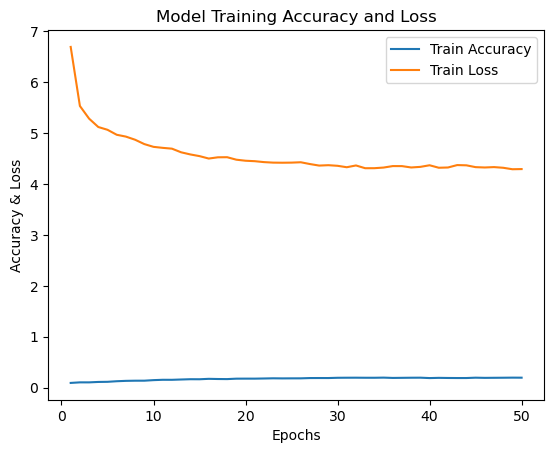

In [21]:
import matplotlib.pyplot as plt

train_accuracy = history_data['train_accuracy']
train_loss = history_data['train_loss']
# validation_accuracy = history_data['valid_accuracy']
# validation_loss = history_data['valid_loss']

# Plot the data
fig, ax = plt.subplots()
ax.plot(range(1, len(train_accuracy)+1), train_accuracy, label='Train Accuracy')
ax.plot(range(1, len(train_loss)+1), train_loss, label='Train Loss')
# ax.plot(range(1, len(validation_accuracy)+1), validation_accuracy, label='Validation Accuracy')
# ax.plot(range(1, len(validation_loss)+1), validation_loss, label='Validation Loss')

# Add title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy & Loss')
ax.set_title('Model Training Accuracy and Loss')

# Add a legend
plt.legend()
plt.show()

### Save the complete performance metrics alongwith hyperparameters to a pickle file to be used again

In [22]:
from pickle import dump
import os

filename = 'metric_' + feature_extraction_algo_name + '_LR_' + str(LR) + '_BATCH_SIZE_' + str(BATCH_SIZE) + '_EPOCH_' + str(EPOCHS) + '.pkl'
analytic_data_file = os.path.join(generated_data_path, filename)

analytic_data = [history, 
                 bleu_1_score, 
                 bleu_2_score, 
                 feature_extraction_algo_name, 
                 LR, 
                 BATCH_SIZE, 
                 EPOCHS, 
                 model_training_elapsed_time, 
                 len(loaded_features), 
                 vocab_size, 
                 max_caption_length,
                 tokenizer]

with open(analytic_data_file, 'wb') as file:
    dump(analytic_data, file)

### Test Model With a Random Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
---------------------Actual Caption---------------------
<start> boy in blue shorts slides down slide into pool <end>
<start> boy in blue swimming trunks slides down yellow slide into wading pool with inflatable toys floating in the water <end>
<start> boy rides down slide into small backyard pool <end>
<start> boy sliding down slide into pool with colorful tubes <end>
<start> child is falling off slide onto colored balloons floating on pool of water <end>
Image Feature = [[3.8432088 0.        2.085034  ... 0.        0.        0.       ]]
--------------------Predicted Caption--------------------
start man is on the the the the the the the the the the the the the the the the the the the on end


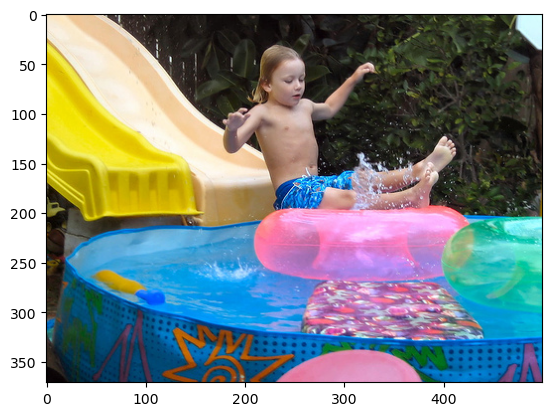

In [23]:
%load_ext autoreload
%autoreload 2

from model_predicton import ModelPrediction
from tensorflow.keras.models import load_model
import os
from PIL import Image
from pickle import load
import matplotlib.pyplot as plt

model_file = os.path.join(os.getcwd(), 'models', 'model.image_cation_generator_cnn_VGG16.keras')
caption_generator_model = load_model(model_file)

ModelPrediction_Obj = ModelPrediction(caption_generator_model)

# Function for generating caption
def generate_caption(image_name):

    with open(os.path.join(os.getcwd(), 'generated_data', 'metric_VGG16_LR_0.001_BATCH_SIZE_32_EPOCH_50.pkl'), 'rb') as file:
        data = load(file)
        tokenizer = data[11]
        max_caption_length = data[10]

    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join(image_file_path, image_name)
    image = Image.open(img_path)
    captions = image_to_captions_mapping_table[image_id]
    print('---------------------Actual Caption---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = ModelPrediction_Obj.predict_caption(loaded_features[image_id], tokenizer, max_caption_length)
    print('--------------------Predicted Caption--------------------')
    print(y_pred)
    plt.imshow(image)

generate_caption("1077546505_a4f6c4daa9.jpg")